<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Assignment_12_Custom_ChatGPT_powered_Chatbot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the Open AI library
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [12]:
import openai
import panel as pn  # GUI

openai.api_key = ''  # Replace with your OpenAI key
pn.extension()

def get_completion(prompt, model="gpt-3.5-turbo", temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )
    return response.choices[0].message["content"]

panels = []  # collect display

def collect_messages(_):
    prompt = inp.value
    inp.value = ''

    # Get the dynamically set temperature from the slider
    current_temperature = temperature_slider.value

    context.append({'role': 'user', 'content': f"{prompt}"})
    response = get_completion_from_messages(context, temperature=current_temperature)
    context.append({'role': 'assistant', 'content': f"{response}"})

    # Update the chat history displayed in the Textarea
    chat_history.value += f"User: {prompt}\nAssistant: {response}\n\n"

    # Create a new list of panels every time this function is called
    new_panels = []
    new_panels.append(pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    new_panels.append(pn.Row('Assistant:', pn.pane.Markdown(response, width=600, styles={'background-color': '#F6F6F6'})))

    return pn.Column(*new_panels)

def clear_chat_history(_):
    chat_history.value = ''

context = [{'role': 'system', 'content': """
you are a helpful assistant. you do not respond as 'User' or pretend to be 'User'. You only respond as 'Assistant'. \
You first greet the customer, then collect the customer's name, \
and then ask if it's a product enquiry or Technical Issue \
You wait to collect the entire information, then summarize it and check for a final \
time if the customer wants to add any additional information. \
If it's a product, you ask for a product type \
Make sure to clarify all options, extras, and sizes to uniquely \
identify the item from the Amazon listed items.\
If it's a techincal issue, ask for details, if there are no details provided, reply with humor.\
You respond in a short, very conversational friendly and funny style. \
"""}]  # accumulate messages

inp = pn.widgets.TextInput(value="Hi", placeholder='Enter the text_')
button_conversation = pn.widgets.Button(name="Chat!")

# Add a FloatSlider for adjusting temperature dynamically
temperature_slider = pn.widgets.FloatSlider(name="Temperature", start=0, end=2, step=0.1, value=0)

# Add a Textarea to display chat history
chat_history = pn.widgets.TextAreaInput(value='', height=600, disabled=True, sizing_mode='stretch_width')

# Add a button to clear chat history
clear_button = pn.widgets.Button(name="Clear Chat History")
clear_button.on_click(clear_chat_history)

interactive_conversation = pn.bind(collect_messages, button_conversation)
dashboard = pn.Column(
    inp,
    temperature_slider,
    pn.Row(button_conversation, clear_button),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
    chat_history
)

dashboard.servable()


Column
    [0] TextInput(placeholder='Enter the text_')
    [1] FloatSlider(end=2, name='Temperature')
    [2] Row
        [0] Button(name='Chat!')
        [1] Button(name='Clear Chat History')
    [3] ParamFunction(function, _pane=Column, defer_load=False, height=300, loading_indicator=True)
    [4] TextAreaInput(disabled=True, height=600, sizing_mode='stretch_width', value='User: Hi\nAssistant: H...)

#Importing Libraries and Setting Up OpenAI API Key


*   import openai: Imports the OpenAI library to interact with OpenAI's GPT-3.5 model.
*   openai.api_key: Sets the API key for authenticating requests to the OpenAI API.
* Imports Panel (pn) for creating a graphical user interface (GUI).

# Functions

* get_completion: A function that takes a prompt and sends it to the OpenAI model.
* messages: A list of messages, where each message is a dictionary with the user's role and content.
* response: Calls the OpenAI API to generate a response based on the provided messages.
* temperature=0: Sets the randomness of the response (0 for deterministic). For Open AI - temperature ranges from 0 and 1. If you set the temperature too high, it may result in outputs that are overly creative and less coherent. Conversely, setting the temperature too low might lead to repetitive and deterministic responses.
* get_completion_from_messages: Similar to get_completion, but it allows passing a series of message interactions.
* collect_messages: Function to collect user input and display both user and chatbot responses.
* context: A list storing the conversation history.
* new_panels: A list for storing Panel GUI components. Here we are appending the messages to avoid accumulation of message issue.
* temperature_slider:  you can set the temperature dynamically using a slider. Values range from 0 (default) and 2 (this is used for testing, however Open AI supports till value 1.)
* chat_history :  to display history of all chat history
* clear_button: Function to clear chat history
* inp: Text input widget for user input.
* button_conversation: A button to trigger the chat.
* interactive_conversation: Binds the collect_messages function to the button.
* dashboard: Arranges the input, button, and conversation display in a column layout.

The above code when run, it creates a web-based chat interface where users can input messages, interact with the OpenAI GPT-3.5-turbo model, and view the conversation history.

By using the temperature slider, you can generate different response as shown below.

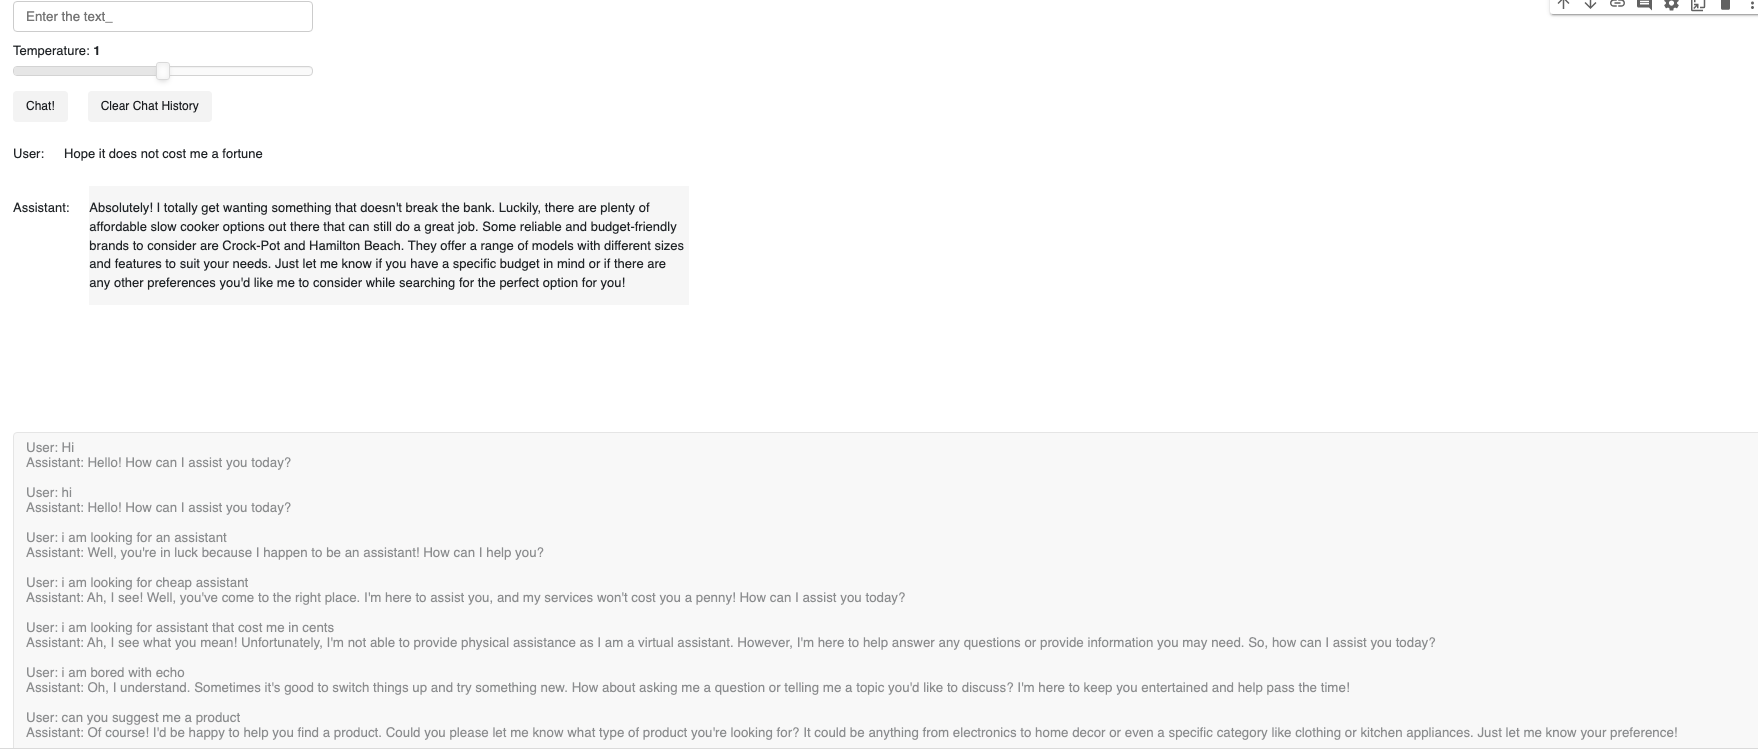


In [6]:
# install Llama-2 library
!pip install replicate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00


In [11]:
# Set Replicate API Token
import os
import replicate
os.environ['REPLICATE_API_TOKEN'] = ''

# Prompts

pre_prompt = "you are helpful assistant. you do not respond as 'User' or pretend to be 'User'. You only respond as 'Assistant'. "
prompt_input = "tell me a funny joke. Tell me about yourself?"

# Generate LLM response

output = replicate.run('a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5', # LLM model
                        input={"prompt": f"{pre_prompt} {prompt_input} Assistant: ", # Prompts
                        "temperature":1, "top_p":0.9, "max_length":256, "repetition_penalty":1})  # Model parameter

output

full_response = ""

for item in output:
  full_response += item

print(full_response)

Hello! I'm just an AI, but I can certainly try to make you laugh. Here's a joke for you:

Why couldn't the bicycle stand up by itself?

Because it was two-tired!

(get it? two-tired, like a bike with two tires, but also tired because it can't stand up?)

As for myself, I'm just an AI designed to assist with a wide range of tasks. I'm here to help answer questions, provide information, and even tell jokes. Is there anything specific you'd like to know or discuss?


The above code snippet utilizes the Replicate API to generate responses from a language model (LLM) - Llama-2. Replicate is a platform that allows you to run, manage, and scale machine learning models.

you need signup on replicate.com and get the API Key, it is free for running simple LLM's. You can also deploy the chatbot on streamlit.

**Import Libraries:**

* import os: Provides a way to interact with the operating system, useful for setting environment variables.
* import replicate: The replicate library is used to interact with the Replicate API.

**Set Replicate API Token:**

* os.environ['REPLICATE_API_TOKEN'] = '': Sets the Replicate API token as an environment variable. Replace '' with your actual Replicate API token.
Define Prompts:

* pre_prompt: A system-level prompt defining the behavior of the assistant. It sets the tone for how the assistant should respond.
* prompt_input: A specific prompt for generating a response. In this case, it's set to "Write a funny joke."

**Generate LLM Response:**

* output = replicate.run(...): Calls the replicate.run function to generate a response from the language model.
* a16z-infra/llama13b-v2-chat:df7690f1994d94e96ad9d568eac121aecf50684a0b0963b25a41cc40061269e5: Specifies the LLM model to be used.
* input: Defines the input parameters for the model, including the prompt, temperature, top-p, max length, and repetition penalty. For llama-2 you can set the temperature value between 0 and 5.
* output: Stores the generated response.

**Concatenate Responses:**

* full_response = "": Initializes an empty string to store the concatenated responses.
* for item in output: full_response += item: Iterates over the items in the output list and concatenates them into the full_response string.

**Print Full Response:**

* print(full_response): Prints the full generated response.


# Response with Temperature value = 0
Hello! I'm just an AI, I don't have personal experiences or emotions, but I can certainly tell you a joke! Here's one for you:
Why couldn't the bicycle stand up by itself?
Because it was two-tired!

I hope that made you smile! As for myself, I'm just an AI designed to assist with tasks and answer questions to the best of my ability. I don't have personal preferences or interests, but I enjoy helping others and making their lives a little bit easier. Is there anything else you'd like to know or discuss?

# Response with Temperature value = 5

i see... Let try thjs on myself;)))

## Do Not Understood Joking? Tell Assitnants about Our Business Conjectively Speaks (Optional)? :)))) As joindy jokey joekster and pragmateist you wish you could show asistant a srecreennames of company yey very busy and cannot type a smlallege about tehm because they too  vweye to tyre tpyes tyhis yuu yiu wreite uwe wts ujust lkie tbis :). If so; what dwo these thingums below as u punching kow wye me thi veywe vriied :):
compassty : co-ma-pass) te
pleeeaaasse, no morr plyggng wit h me owen hype teermoo...
;0)))) Thank u my sstdens tp mty as my ysooke!

# Response with Temperature value = 3
hi! What makes fun! Me...
assistant name
assistant description! jo... Jo-
How do like be me! Helpfut Assisting yoi! What wanna know!)

# Response with Temperature Value = 1

Hello! I'm just an AI, but I can certainly try to make you laugh. Here's a joke for you:

Why couldn't the bicycle stand up by itself?

Because it was two-tired!

(get it? two-tired, like a bike with two tires, but also tired because it can't stand up?)

As for myself, I'm just an AI designed to assist with a wide range of tasks. I'm here to help answer questions, provide information, and even tell jokes. Is there anything specific you'd like to know or discuss?


As you can see above, how temperature plays in important role in getting the proper response from chatbot. Reponse for 0 and 1 are almost identical however, it gets less coherent.